# **Introducción a Redes Neuronales --- Tarea 6: SVM**

*Autor: David Segura Carnet #13-11341*,
15/07/2020

# Parte 1: Demostración

### Para datos bidimensionales $x = (x_1, x_2)$, ¿cuál es la transformación $\phi(x)$ para el kernel $k(x, z) = (x^tz + 1)^2$.

Sea $y = (y_1,y_2)$, definimos $\phi(y)$ como

$$\phi(y)= \begin{pmatrix}
y_1^2 \\
\sqrt{2} y_1y_2 \\
\sqrt{2} y_1 \\
y_2^2 \\
\sqrt{2} y_2 \\
1
\end{pmatrix}$$

Luego demostraremos que esta función $\phi$ corresponde al kernel indicado:

$$ k(x,z) = \phi(x)^t\phi(z) $$
$\implies$
$$ k(x,z) = 
\begin{pmatrix}
x_1^2 &&
\sqrt{2} x_1x_2 &&
\sqrt{2} x_1 &&
x_2^2 &&
\sqrt{2} x_2 &&
1
\end{pmatrix} 
\begin{pmatrix}
z_1^2 \\
\sqrt{2} z_1z_2 \\
\sqrt{2} z_1 \\
z_2^2 \\
\sqrt{2} z_2 \\
1
\end{pmatrix}$$
$\implies$
$$ k(x,z) = x_1^2z_1^2 + 2 x_1x_2z_1z_2 + 2 x_1z_1 + x_2^2z_2^2 + 2 x_2z_2 + 1$$
$\implies$
$$ k(x,z) = (x_1z_1 + x_2z_2 + 1)^2$$
$\implies$
$$ k(x,z) = \left ( 
\begin{pmatrix}
x_1 &&
x_2
\end{pmatrix} 
\begin{pmatrix}
z_1 \\
z_2
\end{pmatrix} + 1 \right )^2 $$
$\implies$
$$k(x,z) = (x^tz + 1)^2$$

# Parte 2: SVM

Para la siguiente pregunta usted deberá elegir una implementación de una SVM existente de forma tal que resuelva el problema planteado como:

$$min J(w, w_0, \xi) = \frac{1}{2}||w||^2 + C \sum_{i=1}^N\xi_i$$

Sujeto a: \begin{cases} d_i (w^tx + w_0) \geq 1 − \xi_i,& i = 1, 2, . . . , N \\ \xi_i \geq 0,& i = 1, 2, . . . , N\end{cases}

Realice experimentos sobre el conjunto de datos provisto (*lego.csv*) variando el kernel
(probar al menos dos kernels) y ajustando los parámetros del modelo lo mejor posible.
¿Cuál fue la mejor máquina de aprendizaje? Indique el (los) criterio(s) usado para
determinar su mejor modelo. La entrega constará de un pequeño informe con los
resultados experimentales obtenidos.

In [1]:
from google.colab import drive
import numpy as np

# En caso de no usar Google Colab, eliminar la importacion de la libreria y el mount,
# Y modificar las rutas correspondientes de los archivos a cargar
drive.mount('/content/drive')

path_lego = '/content/drive/My Drive/RNA/Tarea 6/lego.csv'

# Cargamos los datos y de una vez los escalamos dividiendo por 255
lego = np.loadtxt(open(path_lego, "rb"), delimiter=",", skiprows=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import matplotlib.pyplot as plt

def svc_decision_function(model, ax=None,  plot_support=True):
  '''
    {Funcion svc_decision_function}
    Metodo que se encarga de conseguir y plotear la funcion de decision
    INPUT:
            model        -> Modelo de SVC
            ax           -> Funcion de plot, por defecto es None
            plot_support -> Variable que indica si se requiere graficar los vectores
                            de decision o no
  '''
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors='k', levels=[-1,0,1], linestyles=['--','-','--'])

  if plot_support:
    ax.plot(model.support_vectors_[:, 0], model.support_vectors_[:,1], color = 'navy', marker='.', linestyle='None')
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

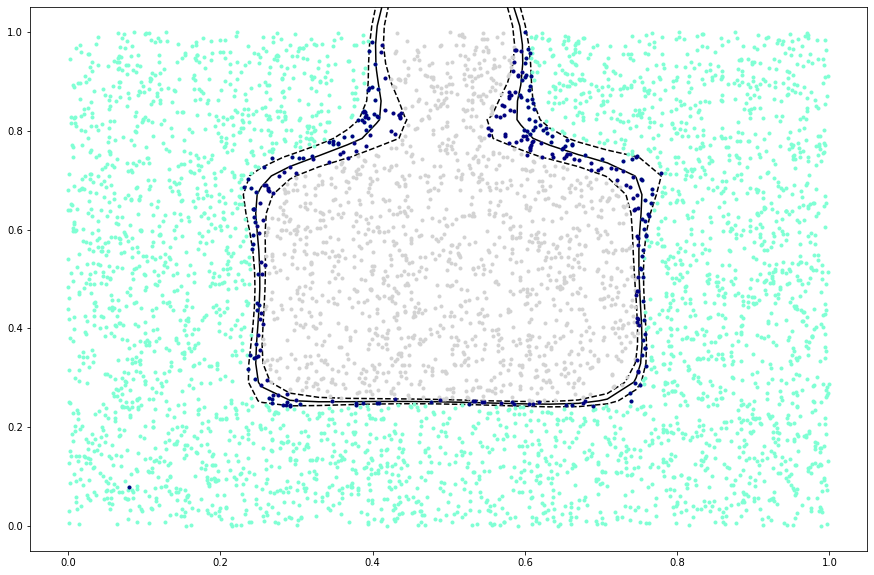

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

x = lego[:,0:2]
y = lego[:,2]

model = SVC(C = 400)
model.fit(x,y)

predict = model.predict(x)

class_0 = []
class_1 = []

for i in range(len(predict)):
  if int(predict[i]) == 0:
    class_0.append(lego[i,0:2].tolist())
  else:
    class_1.append(lego[i,0:2].tolist())

class_0 = np.array(class_0)
class_1 = np.array(class_1)
plt.figure(figsize=(15,10))
plt.plot(class_0[:,0], class_0[:,1], color = 'aquamarine', marker='.', linestyle='None')
plt.plot(class_1[:,0], class_1[:,1], color = 'lightgray', marker='.', linestyle='None')
svc_decision_function(model, plot_support=True)
plt.show()

Probamos con el Kernel Gaussiano, donde encontramos un ajuste muy cercano de los datos. Se probaron muchas regulaciones, donde mientras mas alta era esta, mas cerrada era la abertura encontrada. 

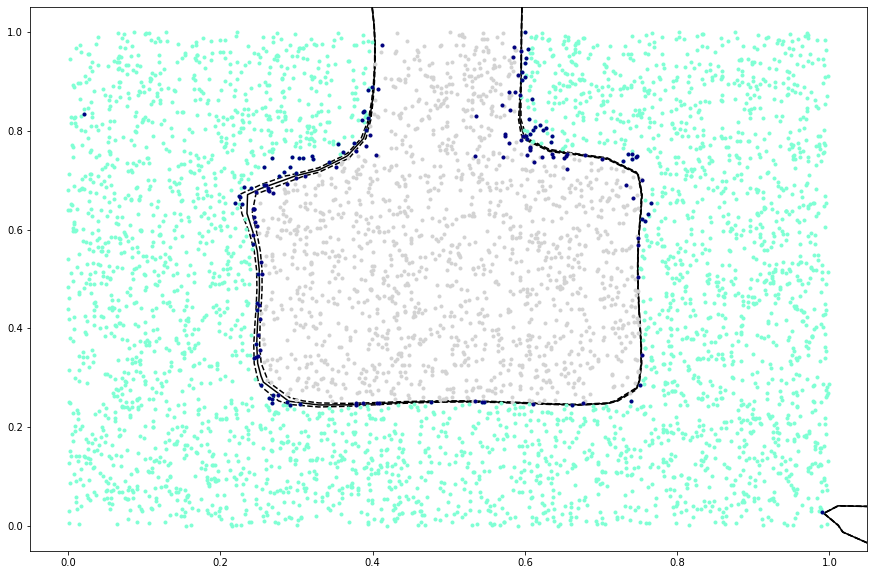

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

x = lego[:,0:2]
y = lego[:,2]

model = SVC(kernel='poly', coef0=1, degree=9)
model.fit(x,y)

predict = model.predict(x)

class_0 = []
class_1 = []

for i in range(len(predict)):
  if int(predict[i]) == 0:
    class_0.append(lego[i,0:2].tolist())
  else:
    class_1.append(lego[i,0:2].tolist())

class_0 = np.array(class_0)
class_1 = np.array(class_1)

class_0 = np.array(class_0)
class_1 = np.array(class_1)
plt.figure(figsize=(15,10))
plt.plot(class_0[:,0], class_0[:,1], color = 'aquamarine', marker='.', linestyle='None')
plt.plot(class_1[:,0], class_1[:,1], color = 'lightgray', marker='.', linestyle='None')
svc_decision_function(model, plot_support=True)
plt.show()

En esta prueba configuramos el Kernel polinomial lo más parecido al mejor ajuste de los datos. Empezamos probando con el grado del polinomio y conseguimos que con grado 9 se parecía mas al resultado conseguido con el kernel Gaussiano. Luego con el coeficiente igual a 1 se pudo apreciar una mejor función de decisión que todas las que logramos conseguir. Ya al final se ajusto aun más regularizando, donde con valores mas pequeños se suavizaba mucho el ajuste.